In [4]:
%matplotlib inline
%config Completer.use_jedi = False # to use autocomplete
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import os
import json
import pandas as pd
import sklearn
from random import seed
from sklearn.model_selection import KFold
from sklearn import linear_model, ensemble, neighbors, tree
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
# from sklearn.preprocessing import PolynomialFeatures
# from texttable import Texttable
import scipy.optimize as optimization
RANDOM_SEED=0
seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
print(sklearn.__version__)
from itertools import combinations
from numpy.random import default_rng
import itertools
plt.rcdefaults()
# plt.rcParams.update({'font.family':'fantasy'})

0.24.2


In [5]:
def path_leaf(path): # get filename(with extension) from path
    head, tail = os.path.split(path)
    return tail or os.path.basename(head)


def file_in_folder(folder_path, flag=1): # get files in given folder, return list of filepath and filename
    file_list = []
    file_name = []
    for(dirpath, dirnames, filenames) in os.walk(folder_path):
#         print(filenames)
        
        for i in filenames:
            try:
                file_list += [dirpath + os.sep + i]
                file_name += [i]
            except:
                continue
        if flag == 0:
            break
        file_list.sort(key=path_leaf)
        file_name.sort()
    return [file_list, file_name]

In [6]:
res_dir = '../../prediction_code/mse_in_sample_transfer/in_sample'
all_folders = [os.path.join(res_dir, i) for i in os.listdir(res_dir)]

data_folder = '../../../data/PPP_normalized_44'
file_list, file_name = file_in_folder(data_folder)
file_list = [i for i in file_list if '.csv' in i]
file_name = [i for i in file_name if '.csv' in i]
num_name_dic = {i: name for i, name in enumerate(file_name)}
name_num_dic = {name: i for i, name in enumerate(file_name)}
# num_name_dic = {i: name for i, name in enumerate(file_name) if '30countries' in name}
# name_num_dic = {name: i for i, name in enumerate(file_name) if '30countries' in name}
print(num_name_dic, name_num_dic)

all_params = ['a', 'b', 'd', 'g']
CPT_models = []
for i in range(1, len(all_params)+1):
    tmp = list(itertools.combinations(all_params, i))
    CPT_models += tmp
    
CPT_models = [''.join(i) for i in CPT_models]
CPT_models = ['g', 'ab', 'dg', 'abg', 'abdg']
# model_types = [model_types[-1]]
print(CPT_models)
ML_models = ['DT', 'RF', 'NN']
# ML_models = ['Lasso', 'RF', 'NN']
ML_models = ['EU_iso', 'RF', 'kernel_ridge_rbf']
all_models = CPT_models + ML_models

{0: 'Australia_data_30countries.csv', 1: 'Belgium_data_30countries.csv', 2: 'Brazil_data_30countries.csv', 3: 'Cambodia_data_30countries.csv', 4: 'Chile_data_30countries.csv', 5: 'China_data_30countries.csv', 6: 'Colombia_data_30countries.csv', 7: 'Costa Rica_data_30countries.csv', 8: 'Czech Republic_data_30countries.csv', 9: 'Ethiopia_data_30countries.csv', 10: 'France_data_30countries.csv', 11: 'Germany_data_30countries.csv', 12: 'Guatemala_data_30countries.csv', 13: 'India_data_30countries.csv', 14: 'Japan_data_30countries.csv', 15: 'Kyrgyzstan_data_30countries.csv', 16: 'Malaysia_data_30countries.csv', 17: 'Monetary incentives in the loss domain.csv', 18: 'Nicaragua_data_30countries.csv', 19: 'Nigeria_data_30countries.csv', 20: 'Peru_data_30countries.csv', 21: 'Poland_data_30countries.csv', 22: 'Russia_data_30countries.csv', 23: 'Saudi Arabia_data_30countries.csv', 24: 'South Africa_data_30countries.csv', 25: 'Spain_data_30countries.csv', 26: 'Thailand_data_30countries.csv', 27: 'T

In [7]:
show_num_name_dic = {'num': [], 'name': []}
for key, val in num_name_dic.items():
    show_num_name_dic['num'].append(key)
    show_num_name_dic['name'].append(val)
num_name_df = pd.DataFrame.from_dict(show_num_name_dic)
print(num_name_df.to_latex(index=False))
num_name_df


\begin{tabular}{rl}
\toprule
 num &                                               name \\
\midrule
   0 &                     Australia\_data\_30countries.csv \\
   1 &                       Belgium\_data\_30countries.csv \\
   2 &                        Brazil\_data\_30countries.csv \\
   3 &                      Cambodia\_data\_30countries.csv \\
   4 &                         Chile\_data\_30countries.csv \\
   5 &                         China\_data\_30countries.csv \\
   6 &                      Colombia\_data\_30countries.csv \\
   7 &                    Costa Rica\_data\_30countries.csv \\
   8 &                Czech Republic\_data\_30countries.csv \\
   9 &                      Ethiopia\_data\_30countries.csv \\
  10 &                        France\_data\_30countries.csv \\
  11 &                       Germany\_data\_30countries.csv \\
  12 &                     Guatemala\_data\_30countries.csv \\
  13 &                         India\_data\_30countries.csv \\
  14 &             

,num,name
0,0,Australia_data_30countries.csv
1,1,Belgium_data_30countries.csv
2,2,Brazil_data_30countries.csv
3,3,Cambodia_data_30countries.csv
4,4,Chile_data_30countries.csv
5,5,China_data_30countries.csv
6,6,Colombia_data_30countries.csv
7,7,Costa Rica_data_30countries.csv
8,8,Czech Republic_data_30countries.csv
9,9,Ethiopia_data_30countries.csv


In [8]:
def get_in_sample(folder='../../prediction_code/mse_in_sample_transfer/in_sample'):
    in_sample_folders = os.listdir(folder)
    res = {}
    for cur_fol in in_sample_folders:
        file_list, file_name = file_in_folder(os.path.join(folder, cur_fol))
        file_list = [i for i in file_list if '.json' in i]
        file_name = [i for i in file_name if '.json' in i]
#         print(file_list)
        for file in file_list:
            with open(file, 'r') as f:
                content = json.load(f)
#             print(content)
            if cur_fol not in res.keys():
                res[cur_fol] = {}
#             print(file)
#             if '/EU' in file:
#                 tmp = 'EU'
#             else:
            tmp = content['model_type']
            res[cur_fol][tmp] = content['train_mse']
    print(res)
    return res

In [9]:
in_sample_res = get_in_sample()

{'32': {'EU_expo': 98.05439546425342, 'EU_iso': 96.78211735028366, 'RF': 22.0382371098342, 'a': 96.45314988583107, 'ab': 96.45314988583108, 'abd': 80.50749887065983, 'abdg': 40.59413808576507, 'abg': 42.57730662751866, 'ad': 84.7525276032429, 'adg': 40.594138085760676, 'ag': 42.57730662751865, 'b': 98.05439546425342, 'bd': 97.65227409409118, 'bdg': 45.55436640438005, 'bg': 45.55612108761079, 'd': 97.65227409409117, 'dg': 45.55436640437995, 'g': 45.5561210876108, 'kernel_ridge_rbf': 22.1277134329341}, '35': {'EU_expo': 1.9725716349701312, 'EU_iso': 1.553385041791739, 'RF': 1.344576421686958, 'a': 1.3734339285488562, 'ab': 1.3734339285488562, 'abd': 1.3734339285488564, 'abdg': 1.3734339285488564, 'abg': 1.3734339285488562, 'ad': 1.373433928548856, 'adg': 1.3734339285488562, 'ag': 1.3734339285488562, 'b': 1.9725716349701312, 'bd': 1.3734339285488562, 'bdg': 1.3734339285488562, 'bg': 1.9725716349701312, 'd': 1.3734339285488564, 'dg': 1.3734339285488564, 'g': 1.9725716349701312, 'kernel_rid

In [11]:
def get_round(a, digit=3):
    return round(a, digit)

def get_res(folder, normalize=False, in_sample_dic=None):
    file_list, file_name = file_in_folder(folder)
    file_list = [i for i in file_list if '.json' in i]
    file_name = [i for i in file_name if '.json' in i]
    print(file_list)
    res_dic = {'model': [], 'train_data': [], 'train_mse': []}
    train_data = folder.split('/')[1]
    for model_type in all_models:
        for file in file_list:
            file_type = path_leaf(file).split('.json')[0]
            if model_type == file_type:
                with open(file, 'r') as f:
                    content = json.load(f)
#                 print(content)
                res_dic['model'].append(content['model_type'])
                res_dic['train_data'].append(train_data)
                res_dic['train_mse'].append(get_round(content['train_mse']))
                for key, val in content['test_mse'].items():
                    if key not in num_name_dic.keys():
                        continue
                    if key not in res_dic.keys():
                        res_dic[key] = []
                    if normalize:
                        res_dic[key].append(get_round(val/in_sample_dic[key][model_type]))
                    else:
                        res_dic[key].append(get_round(val))

#     print(res_dic)
    df = pd.DataFrame.from_dict(res_dic)
    display(df)
    print(df.to_latex(index=False))
    return res_dic

In [12]:
print(len(in_sample_res.keys()))
in_sample_res['31']

44


{'EU_expo': 319676403.3705415,
 'EU_iso': 306687621.31341386,
 'RF': 223538973.9540428,
 'a': 298436111.7655749,
 'ab': 297999520.27154714,
 'abd': 291276841.036299,
 'abdg': 226492755.67801186,
 'abg': 226507403.92863357,
 'ad': 291276841.0362987,
 'adg': 226654993.74199992,
 'ag': 229674254.17012292,
 'b': 319239811.8765137,
 'bd': 293078915.0490764,
 'bdg': 233094070.01005057,
 'bg': 252506596.24761423,
 'd': 293078915.0490763,
 'dg': 233094070.01005054,
 'g': 255588006.62003183,
 'kernel_ridge_rbf': 228627145.0488663}

In [13]:
def get_index(arr, median_of):
    # median_of is 'min', 'max', or percentile (50, 75, 90, etc.)
    if median_of == 'max':
        return np.argmax(arr)
    elif median_of == 'min':
        return np.argmin(arr)
    else:
        percent = int(median_of)
        interpolation = 'higher'
        if percent < 50:
            interpolation = 'lower'
        val = np.percentile(arr, percent, interpolation=interpolation)
#         if val in arr:
#             print(1, val)
#         else:
#             print(0, val)
#             print(arr)
        if type(arr) == np.ndarray:
            return np.where(arr == val)[0][0]
        else:
            return arr.index(val)

def get_percentile(arr, median_of):
    # median_of is 'min', 'max', or percentile (50, 75, 90, etc.)
    if median_of == 'max':
        return np.max(arr)
    elif median_of == 'min':
        return np.min(arr)
    else:
        percent = int(median_of)
        interpolation = 'higher'
        if percent < 50:
            interpolation = 'lower'
        val = np.percentile(arr, percent, interpolation=interpolation)
        return val

def get_median_transfer_error(folder_list, all_contents=None, normalize=False, in_sample_dic=None, use_best_in_sample=False, median_of='max', 
                              median_of_list=None, model_to_see=None):
    print(model_to_see)
    if use_best_in_sample:
        best_in_sample_across_model = {}
        for key, val in in_sample_dic.items():
            best_in_sample_across_model[key] = {}

            best_in_sample = 1e10
            for model_type, cur_error in val.items():
                if model_type not in model_to_see:
                    continue
                if best_in_sample > cur_error:
                    best_in_sample = cur_error
            for model_type in val.keys():
                if model_type not in model_to_see:
                    continue
                best_in_sample_across_model[key][model_type] = best_in_sample
    else:
        best_in_sample_across_model = in_sample_dic
    
        
#     print(best_in_sample_across_model)
#     res_dic = {'model': [], 'train_data': [], 'train_mse': []}
    res_dic = {}
    all_res_dic = {}
    for folder in folder_list:
        print(folder)
        if path_leaf(folder) == '.DS_Store' or int(path_leaf(folder)) not in num_name_dic.keys():
            continue
        file_list, file_name = file_in_folder(folder)
        file_list = [i for i in file_list if '.json' in i]
        file_name = [i for i in file_name if '.json' in i]
#         print(file_list)
        
        train_data = folder.split('/')[1]
        for model_type in model_to_see:
            if model_type not in res_dic.keys():
                res_dic[model_type] = {'train_data': [], 'transfer_domain': [], 'in_sample': [], 
                                       'raw_transfer': [], 'best_in_sample': [], 'transfer_ratio': []}
                all_res_dic[model_type] = {'train_data': [], 'transfer_domain': [], 'in_sample': [], 
                                       'raw_transfer': [], 'best_in_sample': [], 'transfer_ratio': []}
            for file in file_list:
                file_type = path_leaf(file).split('.json')[0]
                if model_type == file_type:
                    if all_contents is not None:
                        content = all_contents[file]
                    else:
                        with open(file, 'r') as f:
                            content = json.load(f)

                    all_transfer_domain = []
                    all_transfer_error_ratio = []
                    raw_transfer = []
                    in_sample = []
                    best_in_sample = []
                    for key, val in content['test_mse'].items():
#                         print(key, type(key))
                        if int(key) not in num_name_dic.keys():
                            continue
                        all_transfer_domain.append(key)
                        raw_transfer.append(get_round(np.sqrt(val)))
                        in_sample.append(get_round(np.sqrt(in_sample_dic[key][model_type])))
                        best_in_sample.append(get_round(np.sqrt(best_in_sample_across_model[key][model_type])))
#                         all_transfer_error_ratio.append(get_round(best_in_sample_across_model[key][model_type]/val))
                        all_transfer_error_ratio.append(get_round(np.sqrt(val)/np.sqrt(best_in_sample_across_model[key][model_type])))
#                         if normalize:
#                             all_transfer_error_ratio.append(get_round(best_in_sample_across_model[key][model_type]/val))
#                         else:
#                             all_transfer_error_ratio.append(get_round(val))
                    
#                     print(len(all_transfer_domain))
                    if normalize:
                        list_to_find_index = all_transfer_error_ratio
                    else:
                        list_to_find_index = raw_transfer
#                     best_idx = np.argmax(raw_transfer)
                    best_idx = get_index(list_to_find_index, median_of=median_of)
#                     print(best_idx)
                    res_dic[model_type]['train_data'].append(train_data)
                    res_dic[model_type]['transfer_ratio'].append(all_transfer_error_ratio[best_idx])
                    res_dic[model_type]['transfer_domain'].append(all_transfer_domain[best_idx])
                    res_dic[model_type]['raw_transfer'].append(raw_transfer[best_idx])
                    res_dic[model_type]['in_sample'].append(in_sample[best_idx])
                    res_dic[model_type]['best_in_sample'].append(best_in_sample[best_idx])
                    
                    all_res_dic[model_type]['train_data'].append([train_data]*len(all_transfer_error_ratio))
                    all_res_dic[model_type]['transfer_ratio'].append(all_transfer_error_ratio)
                    all_res_dic[model_type]['transfer_domain'].append(all_transfer_domain)
                    all_res_dic[model_type]['raw_transfer'].append(raw_transfer)
                    all_res_dic[model_type]['in_sample'].append(in_sample)
                    all_res_dic[model_type]['best_in_sample'].append(best_in_sample)
    
    
    final_return = {}
    for median_of in median_of_list:
        print(median_of)
        res_dic = {}
        for model_type in model_to_see:
            if model_type not in res_dic.keys():
                res_dic[model_type] = {'train_data': [], 'transfer_domain': [], 'in_sample': [], 
                                       'raw_transfer': [], 'best_in_sample': [], 'transfer_ratio': []}
            
#             for i in range(len(all_res_dic[model_type]['train_data'])):
            print(model_type, len(all_res_dic[model_type]['train_data']))
            train_data = all_res_dic[model_type]['train_data'][0][0]
            all_transfer_domain = np.array(all_res_dic[model_type]['transfer_domain']).reshape(-1,)
            all_transfer_error_ratio = np.array(all_res_dic[model_type]['transfer_ratio']).reshape(-1,)
            raw_transfer = np.array(all_res_dic[model_type]['raw_transfer']).reshape(-1,)
            in_sample = np.array(all_res_dic[model_type]['in_sample']).reshape(-1,)
            best_in_sample = np.array(all_res_dic[model_type]['best_in_sample']).reshape(-1,)
#             print(all_transfer_domain.shape, all_transfer_error_ratio.shape, raw_transfer.shape, in_sample.shape, best_in_sample.shape)

            if normalize:
                list_to_find_index = all_transfer_error_ratio
            else:
                list_to_find_index = raw_transfer

            best_idx = get_index(list_to_find_index, median_of=median_of)

            res_dic[model_type]['train_data'].append(train_data)
            res_dic[model_type]['transfer_ratio'].append(all_transfer_error_ratio[best_idx])
            res_dic[model_type]['transfer_domain'].append(all_transfer_domain[best_idx])
            res_dic[model_type]['raw_transfer'].append(raw_transfer[best_idx])
            res_dic[model_type]['in_sample'].append(in_sample[best_idx])
            res_dic[model_type]['best_in_sample'].append(best_in_sample[best_idx])
            
            
            
        if normalize:
            sort_key = 'transfer_ratio'
        else:
            sort_key = 'raw_transfer'
        final_res = {'model': [], 'train_data': [], 'transfer_domain': [], 'in_sample': [], 'raw_transfer': [], 
                     'best_in_sample': [], 'transfer_ratio': []}
        only_median_res = {'model': [], 'median_transfer_error': []}
        for key, val in res_dic.items():
#             print(key)
            df = pd.DataFrame.from_dict(val)
#             print(df.shape)
#             display(df)
            final_res['model'].append(key)
            final_res['train_data'].append(df['train_data'].values[0])
            final_res['transfer_domain'].append(df['transfer_domain'].values[0])
            final_res['transfer_ratio'].append(df['transfer_ratio'].values[0])
            final_res['raw_transfer'].append(df['raw_transfer'].values[0])
            final_res['in_sample'].append(df['in_sample'].values[0])
            final_res['best_in_sample'].append(df['best_in_sample'].values[0])
    #         only_median_res['model'].append(key)
    #         only_median_res['median_transfer_error'].append(df['raw_transfer'].median())

#             if df.shape[0] % 2 == 1:
#                 tmp_rol = df.loc[df[sort_key]==df[sort_key].median()]

#                 tmp_df = df.sort_values(by=sort_key)
#                 left_idx = (tmp_df.shape[0] - 1) // 2
#                 tmp_rol = tmp_df.iloc[left_idx]

#                 final_res['model'].append(key)
#                 final_res['train_data'].append(tmp_rol['train_data'])
#                 final_res['transfer_domain'].append(tmp_rol['transfer_domain'])
#                 final_res['transfer_ratio'].append(tmp_rol['transfer_ratio'])
#                 final_res['raw_transfer'].append(tmp_rol['raw_transfer'])
#                 final_res['in_sample'].append(tmp_rol['in_sample'])
#                 final_res['best_in_sample'].append(tmp_rol['best_in_sample'])

#             else:
#     #             print(2)
#                 tmp_df = df.sort_values(by=sort_key)
#     #             if key == 'NN':
#     #                 display(tmp_df)
#     #             display(tmp_df[tmp_df['transfer_error'] < tmp_df['transfer_error'].median()].iloc[-1])
#                 left_idx = (tmp_df.shape[0] - 1) // 2
#                 right_idx = (tmp_df.shape[0] + 1) // 2
#     #             display(tmp_df[tmp_df['transfer_error'] < tmp_df['transfer_error'].median()].iloc[-1])
#     #             tmp_rol = tmp_df[tmp_df['transfer_ratio'] < tmp_df['transfer_ratio'].median()].iloc[-1]

#     #             tmp_rol = tmp_df.iloc[left_idx]
#     #             final_res['model'].append(key)
#     #             final_res['train_data'].append(tmp_rol['train_data'])
#     #             final_res['transfer_domain'].append(tmp_rol['transfer_domain'])
#     #             final_res['transfer_ratio'].append(tmp_rol['transfer_ratio'])
#     #             final_res['raw_transfer'].append(tmp_rol['raw_transfer'])
#     #             final_res['in_sample'].append(tmp_rol['in_sample'])
#     #             final_res['best_in_sample'].append(tmp_rol['best_in_sample'])

#     #             display(tmp_df[tmp_df['transfer_error'] > tmp_df['transfer_error'].median()].iloc[0])
#     #             tmp_rol = tmp_df[tmp_df['transfer_ratio'] > tmp_df['transfer_ratio'].median()].iloc[0]
#                 tmp_rol = tmp_df.iloc[right_idx]
#                 final_res['model'].append(key)
#                 final_res['train_data'].append(tmp_rol['train_data'])
#                 final_res['transfer_domain'].append(tmp_rol['transfer_domain'])
#                 final_res['transfer_ratio'].append(tmp_rol['transfer_ratio'])
#                 final_res['raw_transfer'].append(tmp_rol['raw_transfer'])
#                 final_res['in_sample'].append(tmp_rol['in_sample'])
#                 final_res['best_in_sample'].append(tmp_rol['best_in_sample'])


    #     print(final_res)
#         df = pd.DataFrame.from_dict(final_res)
#     display(df)
#     print(df.to_latex(index=False))
        final_return[median_of] = final_res[sort_key]
#     return final_res[sort_key]
    return final_return, res_dic

In [14]:
raw_transfer_dic, best_in_sample_across_model = get_median_transfer_error(all_folders, normalize=True, in_sample_dic=in_sample_res, 
                                                                          use_best_in_sample=True, median_of_list=['max', 95, 90, 75, 50, 25, 10, 5, 'min'], 
                                                                          model_to_see=CPT_models+ML_models)

['g', 'ab', 'dg', 'abg', 'abdg', 'EU_iso', 'RF', 'kernel_ridge_rbf']
../../prediction_code/mse_in_sample_transfer/in_sample/32
../../prediction_code/mse_in_sample_transfer/in_sample/35
../../prediction_code/mse_in_sample_transfer/in_sample/34
../../prediction_code/mse_in_sample_transfer/in_sample/33
../../prediction_code/mse_in_sample_transfer/in_sample/.DS_Store
../../prediction_code/mse_in_sample_transfer/in_sample/20
../../prediction_code/mse_in_sample_transfer/in_sample/18
../../prediction_code/mse_in_sample_transfer/in_sample/27
../../prediction_code/mse_in_sample_transfer/in_sample/9
../../prediction_code/mse_in_sample_transfer/in_sample/0
../../prediction_code/mse_in_sample_transfer/in_sample/11
../../prediction_code/mse_in_sample_transfer/in_sample/7
../../prediction_code/mse_in_sample_transfer/in_sample/29
../../prediction_code/mse_in_sample_transfer/in_sample/16
../../prediction_code/mse_in_sample_transfer/in_sample/42
../../prediction_code/mse_in_sample_transfer/in_sample/6


## For each training domain, find the specific transfer error.  Then report the median of the specific transfer errors, across training domains.

In [15]:
%%time
raw_transfer_dic = {}
median_of_list = ['max', 95, 90, 75, 50, 25, 10, 5, 'min']

raw_transfer_dic,_ = get_median_transfer_error(all_folders, normalize=False, in_sample_dic=in_sample_res, use_best_in_sample=False, median_of_list=median_of_list, model_to_see=CPT_models+ML_models)

['g', 'ab', 'dg', 'abg', 'abdg', 'EU_iso', 'RF', 'kernel_ridge_rbf']
../../prediction_code/mse_in_sample_transfer/in_sample/32
../../prediction_code/mse_in_sample_transfer/in_sample/35
../../prediction_code/mse_in_sample_transfer/in_sample/34
../../prediction_code/mse_in_sample_transfer/in_sample/33
../../prediction_code/mse_in_sample_transfer/in_sample/.DS_Store
../../prediction_code/mse_in_sample_transfer/in_sample/20
../../prediction_code/mse_in_sample_transfer/in_sample/18
../../prediction_code/mse_in_sample_transfer/in_sample/27
../../prediction_code/mse_in_sample_transfer/in_sample/9
../../prediction_code/mse_in_sample_transfer/in_sample/0
../../prediction_code/mse_in_sample_transfer/in_sample/11
../../prediction_code/mse_in_sample_transfer/in_sample/7
../../prediction_code/mse_in_sample_transfer/in_sample/29
../../prediction_code/mse_in_sample_transfer/in_sample/16
../../prediction_code/mse_in_sample_transfer/in_sample/42
../../prediction_code/mse_in_sample_transfer/in_sample/6


## For each training domain, find the MAX ratio normalized by best IN SAMPLE of ALL MODELS. Then report the median of the max ratios, across training domains.

In [16]:
%%time
best_normalize_dic = {}

best_normalize_dic,_ = get_median_transfer_error(all_folders, normalize=True, 
                                               in_sample_dic=in_sample_res, use_best_in_sample=True, median_of_list=median_of_list, model_to_see=CPT_models+ML_models)

['g', 'ab', 'dg', 'abg', 'abdg', 'EU_iso', 'RF', 'kernel_ridge_rbf']
../../prediction_code/mse_in_sample_transfer/in_sample/32
../../prediction_code/mse_in_sample_transfer/in_sample/35
../../prediction_code/mse_in_sample_transfer/in_sample/34
../../prediction_code/mse_in_sample_transfer/in_sample/33
../../prediction_code/mse_in_sample_transfer/in_sample/.DS_Store
../../prediction_code/mse_in_sample_transfer/in_sample/20
../../prediction_code/mse_in_sample_transfer/in_sample/18
../../prediction_code/mse_in_sample_transfer/in_sample/27
../../prediction_code/mse_in_sample_transfer/in_sample/9
../../prediction_code/mse_in_sample_transfer/in_sample/0
../../prediction_code/mse_in_sample_transfer/in_sample/11
../../prediction_code/mse_in_sample_transfer/in_sample/7
../../prediction_code/mse_in_sample_transfer/in_sample/29
../../prediction_code/mse_in_sample_transfer/in_sample/16
../../prediction_code/mse_in_sample_transfer/in_sample/42
../../prediction_code/mse_in_sample_transfer/in_sample/6


## For each training domain, find the MAX ratio normalized by MODEL IN SAMPLE. Then report the median of the max ratios, across training domains.

In [17]:
%%time
same_model_normalize_dic = {}

same_model_normalize_dic,_ = get_median_transfer_error(all_folders, normalize=True, 
                                                     in_sample_dic=in_sample_res, use_best_in_sample=False, median_of_list=median_of_list, model_to_see=CPT_models+ML_models)

['g', 'ab', 'dg', 'abg', 'abdg', 'EU_iso', 'RF', 'kernel_ridge_rbf']
../../prediction_code/mse_in_sample_transfer/in_sample/32
../../prediction_code/mse_in_sample_transfer/in_sample/35
../../prediction_code/mse_in_sample_transfer/in_sample/34
../../prediction_code/mse_in_sample_transfer/in_sample/33
../../prediction_code/mse_in_sample_transfer/in_sample/.DS_Store
../../prediction_code/mse_in_sample_transfer/in_sample/20
../../prediction_code/mse_in_sample_transfer/in_sample/18
../../prediction_code/mse_in_sample_transfer/in_sample/27
../../prediction_code/mse_in_sample_transfer/in_sample/9
../../prediction_code/mse_in_sample_transfer/in_sample/0
../../prediction_code/mse_in_sample_transfer/in_sample/11
../../prediction_code/mse_in_sample_transfer/in_sample/7
../../prediction_code/mse_in_sample_transfer/in_sample/29
../../prediction_code/mse_in_sample_transfer/in_sample/16
../../prediction_code/mse_in_sample_transfer/in_sample/42
../../prediction_code/mse_in_sample_transfer/in_sample/6


# make tables

In [18]:
def make_tables(model, data, median_of_list):
    res = {'model': model}
    for median_of in median_of_list:
        res[median_of] = data[median_of]
#     res[f'lower_{lower_percent}'] = data[lower_percent]
#     res[f'higher_{higher_percent}'] = data[higher_percent]

    df = pd.DataFrame.from_dict(res)
    display(df)
    print(df.to_latex(index=False))
#     return res

In [19]:
make_tables(all_models, raw_transfer_dic, median_of_list)
make_tables(all_models, best_normalize_dic, median_of_list)
make_tables(all_models, same_model_normalize_dic, median_of_list)

,model,max,95,90,75,50,25,10,5,min
0,g,23104.960,15.828,9.665,4.917,3.804,3.118,2.817,2.502,0.811
1,ab,19999.414,16.130,9.902,5.127,3.889,3.220,2.862,2.564,0.714
2,dg,23052.755,17.191,9.482,5.038,3.935,3.164,2.753,2.475,0.714
3,abg,28122.264,15.907,9.507,5.765,3.900,3.176,2.762,2.468,0.714
4,abdg,27959.100,15.987,9.482,5.531,3.916,3.173,2.759,2.457,0.714
5,EU_iso,22787.986,16.412,9.967,5.005,3.854,3.171,2.856,2.558,0.724
6,RF,42520.491,31.390,19.870,10.209,4.695,3.444,2.882,2.711,0.964
7,kernel_ridge_rbf,42519.228,33.622,19.600,12.283,5.820,3.596,3.031,2.748,1.006


\begin{tabular}{lrrrrrrrrr}
\toprule
           model &       max &     95 &     90 &     75 &    50 &    25 &    10 &     5 &   min \\
\midrule
               g & 23104.960 & 15.828 &  9.665 &  4.917 & 3.804 & 3.118 & 2.817 & 2.502 & 0.811 \\
              ab & 19999.414 & 16.130 &  9.902 &  5.127 & 3.889 & 3.220 & 2.862 & 2.564 & 0.714 \\
              dg & 23052.755 & 17.191 &  9.482 &  5.038 & 3.935 & 3.164 & 2.753 & 2.475 & 0.714 \\
             abg & 28122.264 & 15.907 &  9.507 &  5.765 & 3.900 & 3.176 & 2.762 & 2.468 & 0.714 \\
            abdg & 27959.100 & 15.987 &  9.482 &  5.531 & 3.916 & 3.173 & 2.759 & 2.457 & 0.714 \\
          EU\_iso & 22787.986 & 16.412 &  9.967 &  5.005 & 3.854 & 3.171 & 2.856 & 2.558 & 0.724 \\
              RF & 42520.491 & 31.390 & 19.870 & 10.209 & 4.695 & 3.444 & 2.882 & 2.711 & 0.964 \\
kernel\_ridge\_rbf & 42519.228 & 33.622 & 19.600 & 12.283 & 5.820 & 3.596 & 3.031 & 2.748 & 1.006 \\
\bottomrule
\end{tabular}



,model,max,95,90,75,50,25,10,5,min
0,g,7.307,2.543,1.578,1.174,1.070,1.040,1.028,1.025,1.010
1,ab,5.284,2.347,1.587,1.196,1.100,1.073,1.057,1.038,1.003
2,dg,7.245,2.474,1.584,1.252,1.073,1.042,1.028,1.022,1.000
3,abg,5.651,2.595,1.921,1.260,1.079,1.042,1.028,1.022,1.003
4,abdg,6.012,2.620,1.876,1.262,1.079,1.044,1.029,1.022,1.003
5,EU_iso,4.439,2.137,1.491,1.187,1.092,1.064,1.050,1.035,1.000
6,RF,33.167,6.424,4.646,2.843,1.209,1.047,1.024,1.017,1.005
7,kernel_ridge_rbf,6.835,5.332,4.508,3.809,1.976,1.053,1.028,1.020,1.006


\begin{tabular}{lrrrrrrrrr}
\toprule
           model &    max &    95 &    90 &    75 &    50 &    25 &    10 &     5 &   min \\
\midrule
               g &  7.307 & 2.543 & 1.578 & 1.174 & 1.070 & 1.040 & 1.028 & 1.025 & 1.010 \\
              ab &  5.284 & 2.347 & 1.587 & 1.196 & 1.100 & 1.073 & 1.057 & 1.038 & 1.003 \\
              dg &  7.245 & 2.474 & 1.584 & 1.252 & 1.073 & 1.042 & 1.028 & 1.022 & 1.000 \\
             abg &  5.651 & 2.595 & 1.921 & 1.260 & 1.079 & 1.042 & 1.028 & 1.022 & 1.003 \\
            abdg &  6.012 & 2.620 & 1.876 & 1.262 & 1.079 & 1.044 & 1.029 & 1.022 & 1.003 \\
          EU\_iso &  4.439 & 2.137 & 1.491 & 1.187 & 1.092 & 1.064 & 1.050 & 1.035 & 1.000 \\
              RF & 33.167 & 6.424 & 4.646 & 2.843 & 1.209 & 1.047 & 1.024 & 1.017 & 1.005 \\
kernel\_ridge\_rbf &  6.835 & 5.332 & 4.508 & 3.809 & 1.976 & 1.053 & 1.028 & 1.020 & 1.006 \\
\bottomrule
\end{tabular}



,model,max,95,90,75,50,25,10,5,min
0,g,7.222,1.466,1.342,1.056,1.012,1.001,1.000,1.000,1.000
1,ab,5.268,1.297,1.147,1.036,1.011,1.003,1.000,1.000,1.000
2,dg,7.175,1.526,1.440,1.213,1.044,1.012,1.005,1.002,1.000
3,abg,5.596,1.852,1.561,1.212,1.056,1.018,1.006,1.003,1.000
4,abdg,5.954,1.816,1.569,1.238,1.059,1.021,1.008,1.004,1.000
5,EU_iso,1.748,1.298,1.158,1.040,1.010,1.002,1.000,1.000,1.000
6,RF,33.167,6.424,4.646,2.843,1.209,1.047,1.024,1.017,1.005
7,kernel_ridge_rbf,6.793,5.293,4.420,3.766,1.973,1.045,1.019,1.012,1.001


\begin{tabular}{lrrrrrrrrr}
\toprule
           model &    max &    95 &    90 &    75 &    50 &    25 &    10 &     5 &   min \\
\midrule
               g &  7.222 & 1.466 & 1.342 & 1.056 & 1.012 & 1.001 & 1.000 & 1.000 & 1.000 \\
              ab &  5.268 & 1.297 & 1.147 & 1.036 & 1.011 & 1.003 & 1.000 & 1.000 & 1.000 \\
              dg &  7.175 & 1.526 & 1.440 & 1.213 & 1.044 & 1.012 & 1.005 & 1.002 & 1.000 \\
             abg &  5.596 & 1.852 & 1.561 & 1.212 & 1.056 & 1.018 & 1.006 & 1.003 & 1.000 \\
            abdg &  5.954 & 1.816 & 1.569 & 1.238 & 1.059 & 1.021 & 1.008 & 1.004 & 1.000 \\
          EU\_iso &  1.748 & 1.298 & 1.158 & 1.040 & 1.010 & 1.002 & 1.000 & 1.000 & 1.000 \\
              RF & 33.167 & 6.424 & 4.646 & 2.843 & 1.209 & 1.047 & 1.024 & 1.017 & 1.005 \\
kernel\_ridge\_rbf &  6.793 & 5.293 & 4.420 & 3.766 & 1.973 & 1.045 & 1.019 & 1.012 & 1.001 \\
\bottomrule
\end{tabular}



# percentile condifence interval result

In [20]:
def calculate_interval(model, data, lower_percent, higher_percent, m=44, k=1):
    res = {'model': [], f'lower_{lower_percent}': [], f'higher_{higher_percent}': [], 'RHS': []}
    res['model'] = model
    res[f'lower_{lower_percent}'] = data[lower_percent]
    res[f'higher_{higher_percent}'] = data[higher_percent]
#     res['RHS'] = [(2 * (res['higher'][i] - res['lower'][i])) / (m - k + 1) for i in range(len(res['lower']))]
    res['RHS'] = [
        (2 * (np.ceil(higher_percent/100 * (m-k)) - np.floor(lower_percent/100 * (m-k)))) / (m - k + 1) 
        for i in range(len(res[f'lower_{lower_percent}']))]
    df = pd.DataFrame.from_dict(res)
    display(df)
    print(df.to_latex(index=False))
    return res

In [21]:
# raw_transfer_dic
# best_normalize_dic
# same_model_normalize_dic
raw_transfer_interval = calculate_interval(all_models, raw_transfer_dic, lower_percent=10, higher_percent=90)

,model,lower_10,higher_90,RHS
0,g,2.817,9.665,1.590909
1,ab,2.862,9.902,1.590909
2,dg,2.753,9.482,1.590909
3,abg,2.762,9.507,1.590909
4,abdg,2.759,9.482,1.590909
5,EU_iso,2.856,9.967,1.590909
6,RF,2.882,19.870,1.590909
7,kernel_ridge_rbf,3.031,19.600,1.590909


\begin{tabular}{lrrr}
\toprule
           model &  lower\_10 &  higher\_90 &      RHS \\
\midrule
               g &     2.817 &      9.665 & 1.590909 \\
              ab &     2.862 &      9.902 & 1.590909 \\
              dg &     2.753 &      9.482 & 1.590909 \\
             abg &     2.762 &      9.507 & 1.590909 \\
            abdg &     2.759 &      9.482 & 1.590909 \\
          EU\_iso &     2.856 &      9.967 & 1.590909 \\
              RF &     2.882 &     19.870 & 1.590909 \\
kernel\_ridge\_rbf &     3.031 &     19.600 & 1.590909 \\
\bottomrule
\end{tabular}



In [22]:
best_normalize_interval = calculate_interval(all_models, best_normalize_dic, lower_percent=10, higher_percent=90)

,model,lower_10,higher_90,RHS
0,g,1.028,1.578,1.590909
1,ab,1.057,1.587,1.590909
2,dg,1.028,1.584,1.590909
3,abg,1.028,1.921,1.590909
4,abdg,1.029,1.876,1.590909
5,EU_iso,1.050,1.491,1.590909
6,RF,1.024,4.646,1.590909
7,kernel_ridge_rbf,1.028,4.508,1.590909


\begin{tabular}{lrrr}
\toprule
           model &  lower\_10 &  higher\_90 &      RHS \\
\midrule
               g &     1.028 &      1.578 & 1.590909 \\
              ab &     1.057 &      1.587 & 1.590909 \\
              dg &     1.028 &      1.584 & 1.590909 \\
             abg &     1.028 &      1.921 & 1.590909 \\
            abdg &     1.029 &      1.876 & 1.590909 \\
          EU\_iso &     1.050 &      1.491 & 1.590909 \\
              RF &     1.024 &      4.646 & 1.590909 \\
kernel\_ridge\_rbf &     1.028 &      4.508 & 1.590909 \\
\bottomrule
\end{tabular}



In [23]:
same_model_interval = calculate_interval(all_models, same_model_normalize_dic, lower_percent=10, higher_percent=90)

,model,lower_10,higher_90,RHS
0,g,1.000,1.342,1.590909
1,ab,1.000,1.147,1.590909
2,dg,1.005,1.440,1.590909
3,abg,1.006,1.561,1.590909
4,abdg,1.008,1.569,1.590909
5,EU_iso,1.000,1.158,1.590909
6,RF,1.024,4.646,1.590909
7,kernel_ridge_rbf,1.019,4.420,1.590909


\begin{tabular}{lrrr}
\toprule
           model &  lower\_10 &  higher\_90 &      RHS \\
\midrule
               g &     1.000 &      1.342 & 1.590909 \\
              ab &     1.000 &      1.147 & 1.590909 \\
              dg &     1.005 &      1.440 & 1.590909 \\
             abg &     1.006 &      1.561 & 1.590909 \\
            abdg &     1.008 &      1.569 & 1.590909 \\
          EU\_iso &     1.000 &      1.158 & 1.590909 \\
              RF &     1.024 &      4.646 & 1.590909 \\
kernel\_ridge\_rbf &     1.019 &      4.420 & 1.590909 \\
\bottomrule
\end{tabular}



# plot intervals

In [26]:
# ML_models = ['RF', 'NN', 'kernel_ridge_poly', 'kernel_ridge_rbf']
color_dic = {'g': 'tab:blue', 'ab': 'tab:orange', 'dg': 'tab:green', 'abg': 'tab:red', 'abdg': 'tab:purple', 
           'RF': 'tab:brown', 'Random Forest': 'tab:brown', 'kernel_ridge_rbf': 'tab:pink', 'EU_iso': 'tab:gray'
          }
def change_to_greek(models):
    dic = {'g': r'$\gamma$', 'ab': r'$\alpha\beta$', 'dg': r'$\delta\gamma$', 
           'abg': r'$\alpha\beta\gamma$', 'abdg': r'$\alpha\beta\delta\gamma$', 
           'RF': 'RF', 'NN': 'NN', 'Random Forest': 'RF', 'Neural Net': 'NN', 
           'kernel_ridge_poly': 'OLS-poly', 'kernel_ridge_rbf': 'KR', 'EU_expo': 'EU-CARA', 'EU_iso': 'EU'
          }
    res = []
    for i in models:
        res.append(dic[i])
    return res

def plot_intervals(model, data, lower_percent, higher_percent, keyword='Errors', capwidth=0.2, savepath=None):
    lw = 2.5
    res = {'model': [], f'lower': [], f'higher': [], 'RHS': []}
    res['model'] = model
    res[f'lower'] = data[lower_percent]
    res[f'higher'] = data[higher_percent]
    count = 0
    for i in range(len(res['lower'])):
        if all_models[i] not in model:
            continue
        x = np.linspace(res['lower'][i], res['higher'][i], 100)
        y = [len(model)-1-count]*100
#         plt.plot(x, y, linewidth=10)
        plt.plot(x, y, lw=lw)
        
        bar_x = [x[0]]*100
        bar_y = np.linspace(y[0]-capwidth/2, y[0]+capwidth/2, 100)
        plt.plot(bar_x, bar_y, color='k', lw=lw)
        bar_x = [x[-1]]*100
        bar_y = np.linspace(y[-1]-capwidth/2, y[-1]+capwidth/2, 100)
        plt.plot(bar_x, bar_y, color='k', lw=lw)
        count += 1
        
    
#     plt.caption(f'{keyword} from {lower_percent}-percentile to {higher_percent}-percentile')
    plt.xlabel(f'{keyword}')
    plt.ylabel(f'Models')
    plt.yticks(range(len(model)), change_to_greek(reversed(model)))
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
    plt.show()
    
    
def plot_intervals(model, data, lower_percent, higher_percent, keyword='Errors', capwidth=0.2, savepath=None):
    lw = 2.5
    res = {'model': [], f'lower': [], f'higher': [], 'RHS': []}
    res['model'] = model
    res[f'lower'] = data[lower_percent]
    res[f'higher'] = data[higher_percent]
    count = 0
    plot_dic = {}
    for i in range(len(res['lower'])):
        if all_models[i] not in model:
            continue
        x = np.linspace(res['lower'][i], res['higher'][i], 100)
        y = [len(model)-1-count]*100
#         plt.plot(x, y, linewidth=10)
        plot_dic[res['higher'][i] - res['lower'][i]] = {'x': x, 'y': y, 'model': res['model'][i]}
    
    model_order = []
    for key in sorted(plot_dic.keys()):
        x = plot_dic[key]['x']
        y = [len(model)-1-count]*100
        model_order.append(plot_dic[key]['model'])
        plt.plot(x, y, lw=lw, color=color_dic[plot_dic[key]['model']])
        
        bar_x = [x[0]]*100
        bar_y = np.linspace(y[0]-capwidth/2, y[0]+capwidth/2, 100)
        plt.plot(bar_x, bar_y, color='k', lw=lw)
        bar_x = [x[-1]]*100
        bar_y = np.linspace(y[-1]-capwidth/2, y[-1]+capwidth/2, 100)
        plt.plot(bar_x, bar_y, color='k', lw=lw)
        count += 1
        
    
#     plt.caption(f'{keyword} from {lower_percent}-percentile to {higher_percent}-percentile')
    plt.xlabel(f'{keyword}')
    plt.ylabel(f'Models')
    plt.yticks(range(len(model_order)), change_to_greek(reversed(model_order)))
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
    plt.show()

## 9-95 percentile

In [27]:
plt.rcdefaults()
plt.rcParams.update({'font.size':18})
plt.rcParams.update({'font.family':'Times New Roman'})
plt.rc('text', usetex=True)
lower_percent = 5
higher_percent = 95
transfer_error = 'Transfer error'
normalized_transfer = 'Normalized transfer error'
same_model_transfer = 'Transfer deterioration'
# ../20220606/
transfer_error = 'Raw transfer error'
normalized_transfer = 'Transfer shortfall'
same_model_transfer = 'Transfer deterioration'
# fol = '../stack_figures/to_stack'
fol = '.'

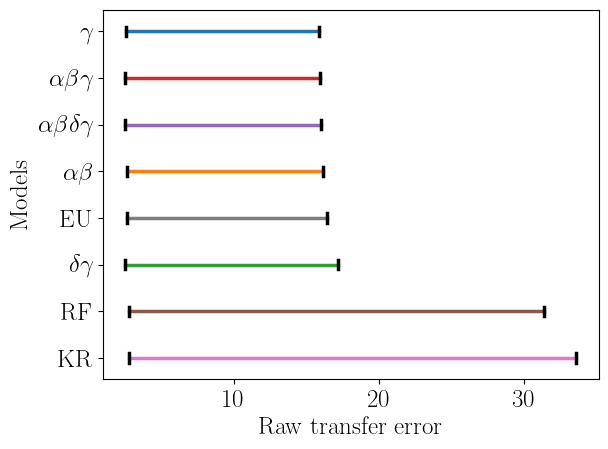

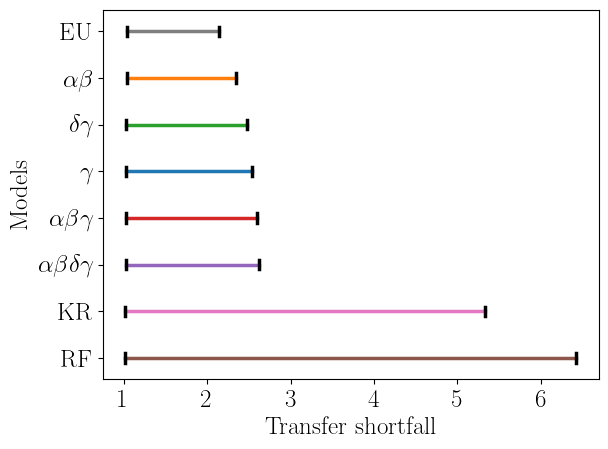

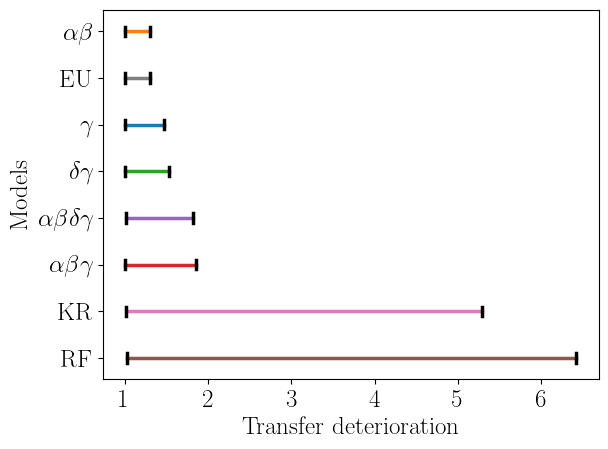

In [28]:
plot_intervals(all_models, raw_transfer_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=transfer_error, savepath=f'{fol}/{lower_percent}_{higher_percent}_interval_transfer_error.pdf')
plot_intervals(all_models, best_normalize_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=normalized_transfer, savepath=f'{fol}/{lower_percent}_{higher_percent}_interval_normalized_transfer_error.pdf')
plot_intervals(all_models, same_model_normalize_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=same_model_transfer, savepath=f'{fol}/{lower_percent}_{higher_percent}_interval_transfer_deterioration.pdf')

# plot_intervals(CPT_models, raw_transfer_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=transfer_error, savepath=f'{fol}/CPT_{lower_percent}_{higher_percent}_interval_transfer_error.pdf')
# plot_intervals(CPT_models, best_normalize_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=normalized_transfer, savepath=f'{fol}/CPT_{lower_percent}_{higher_percent}_interval_normalized_transfer_error.pdf')
# plot_intervals(CPT_models, same_model_normalize_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=same_model_transfer, savepath=f'{fol}/CPT_{lower_percent}_{higher_percent}_interval_transfer_deterioration.pdf')